In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path
import os
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
from IPython.display import Image, display
%matplotlib inline
from IPython.display import display, HTML
import seaborn as sns
sns.set(style="darkgrid")
import pylab as pl

rcParams['font.family'] = 'Retina'
rcParams['font.weight'] = 400

print(matplotlib.get_cachedir())
#print(rcParams.keys())

C:\Users\yliu4\.matplotlib


# Load Data
To use this notebook, you need to run [this](sql/WARS_activity.sql) query and save the results to ```var/activity.csv```.

In [2]:
# cache_filename = './var/activity-2019-10.csv'
# cache_filename = './var/activty.csv'
cache_filename = 'user_activity.csv'
# data_file = Path(cache_filename)
ts = os.path.getmtime(cache_filename)
print('Updated on:{}'.format(datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M')))
# df = pd.read_csv(cache_filename, sep='\t')
df = pd.read_csv(cache_filename, sep=',')
df=df.loc[df['PROJECT_ACTIVITY_STATUS']!='Invite Queued']
df.head()

Updated on:2020-10-23 15:41


,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,SOURCE_APPLICATION,PROJECT_ACTIVITY_STATUS_ID,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE
1,2020,9,22,40,6,1,Sep 30 2020 6:25AM,Australia,APAC,APAC ex-China,...,C,3,Invited,2020,9,22,40,5,1,Sep 29 2020 5:45AM
2,2020,9,22,40,8,1,Sep 28 2020 8:34AM,EMEA PSF,EMEA,EMEA,...,streamliner,54,Highlights Added,2020,9,22,38,14,1,Sep 17 2020 2:05PM
4,2020,9,22,38,18,1,Sep 15 2020 6:37PM,Americas Private,Americas,Americas,...,tasker,10,Given to Client,2020,9,22,38,17,1,Sep 15 2020 5:18PM
5,2020,9,22,39,4,0,Sep 20 2020 4:42AM,Greater China,APAC,Greater China,...,streamliner,54,Highlights Added,2020,9,22,38,12,1,Sep 18 2020 12:02PM
6,2020,9,22,40,23,1,Sep 30 2020 11:48PM,Americas Private,Americas,Americas,...,GiveFaster,54,Highlights Added,2020,9,22,40,18,1,Sep 30 2020 6:27PM


In [3]:
df.PL_REGION.unique()

array(['APAC', 'EMEA', 'Americas', nan], dtype=object)

In [4]:
df.PL_NAME2.unique()

array(['APAC ex-China', 'EMEA', 'Americas', 'Greater China'], dtype=object)

In [5]:
df.PROJECT_ACTIVITY_STATUS.unique()

array(['Invited', 'Highlights Added', 'Given to Client', 'Accept Started',
       'Accepted', 'Scheduled'], dtype=object)

In [6]:
df_datetime = pd.to_datetime(df['CREATED_DATE'], errors='coerce')
df['DAY_OF_YEAR'] = df_datetime.dt.dayofyear
df['DAY_OF_WEEK'] = df_datetime.dt.dayofweek
df.head()

,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE,DAY_OF_YEAR,DAY_OF_WEEK
1,2020,9,22,40,6,1,Sep 30 2020 6:25AM,Australia,APAC,APAC ex-China,...,Invited,2020,9,22,40,5,1,Sep 29 2020 5:45AM,274,2
2,2020,9,22,40,8,1,Sep 28 2020 8:34AM,EMEA PSF,EMEA,EMEA,...,Highlights Added,2020,9,22,38,14,1,Sep 17 2020 2:05PM,272,0
4,2020,9,22,38,18,1,Sep 15 2020 6:37PM,Americas Private,Americas,Americas,...,Given to Client,2020,9,22,38,17,1,Sep 15 2020 5:18PM,259,1
5,2020,9,22,39,4,0,Sep 20 2020 4:42AM,Greater China,APAC,Greater China,...,Highlights Added,2020,9,22,38,12,1,Sep 18 2020 12:02PM,264,6
6,2020,9,22,40,23,1,Sep 30 2020 11:48PM,Americas Private,Americas,Americas,...,Highlights Added,2020,9,22,40,18,1,Sep 30 2020 6:27PM,274,2


# Shape Data

In [7]:
def shape(df):
    # working set
    df_population = df

    # date filters
    df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
    df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

    # status filters
    df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

    df_grouped = df_population.loc[~df_population.CREATED_BY.isin([0, 9999])].groupby(['PL_NAME2', 'DAY_OF_YEAR', 'PROJECT_ACTIVITY_STATUS'])
 
    df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
    df_working['TOTAL'] = df_grouped['PROJECT_ACTIVITY_STATUS'].count().to_frame()['PROJECT_ACTIVITY_STATUS']
    df_working = pd.DataFrame(df_working.to_records())
    df_working.columns = ['PL_NAME2', 'DAY_OF_YEAR', 'PROJECT_ACTIVITY_STATUS', 'UNIQUE_USERS', 'ACTIVITY_COUNT']
    df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['UNIQUE_USERS']
    df_working.head()
    return df_working

df_working = shape(df)
df_working.head()


,PL_NAME2,DAY_OF_YEAR,PROJECT_ACTIVITY_STATUS,UNIQUE_USERS,ACTIVITY_COUNT,ACTIVITY_PER_USER
0,APAC ex-China,245,Accept Started,12,15,1.250000
1,APAC ex-China,245,Accepted,15,19,1.266667
2,APAC ex-China,245,Given to Client,53,159,3.000000
3,APAC ex-China,245,Highlights Added,65,489,7.523077
4,APAC ex-China,245,Invited,62,222,3.580645


# Render Data

In [8]:
def render(df, title=""):
    sns.set(style="darkgrid")
    
    ax = sns.relplot(x="DAY_OF_YEAR", y="UNIQUE_USERS",
                     col="PROJECT_ACTIVITY_STATUS",
                     hue="PL_NAME2",
                     height=6, aspect=1, facet_kws=dict(sharex=False),
                     kind="line", legend="full", data=df)

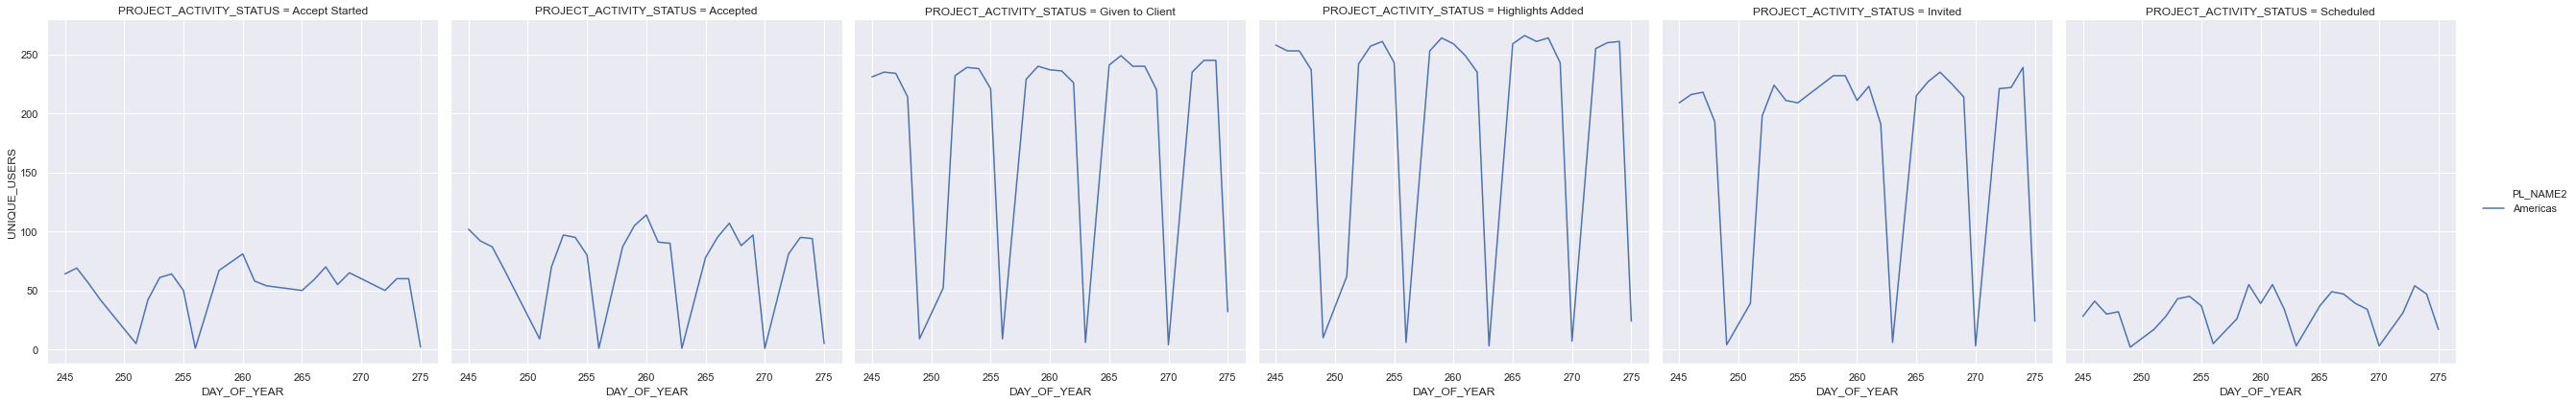

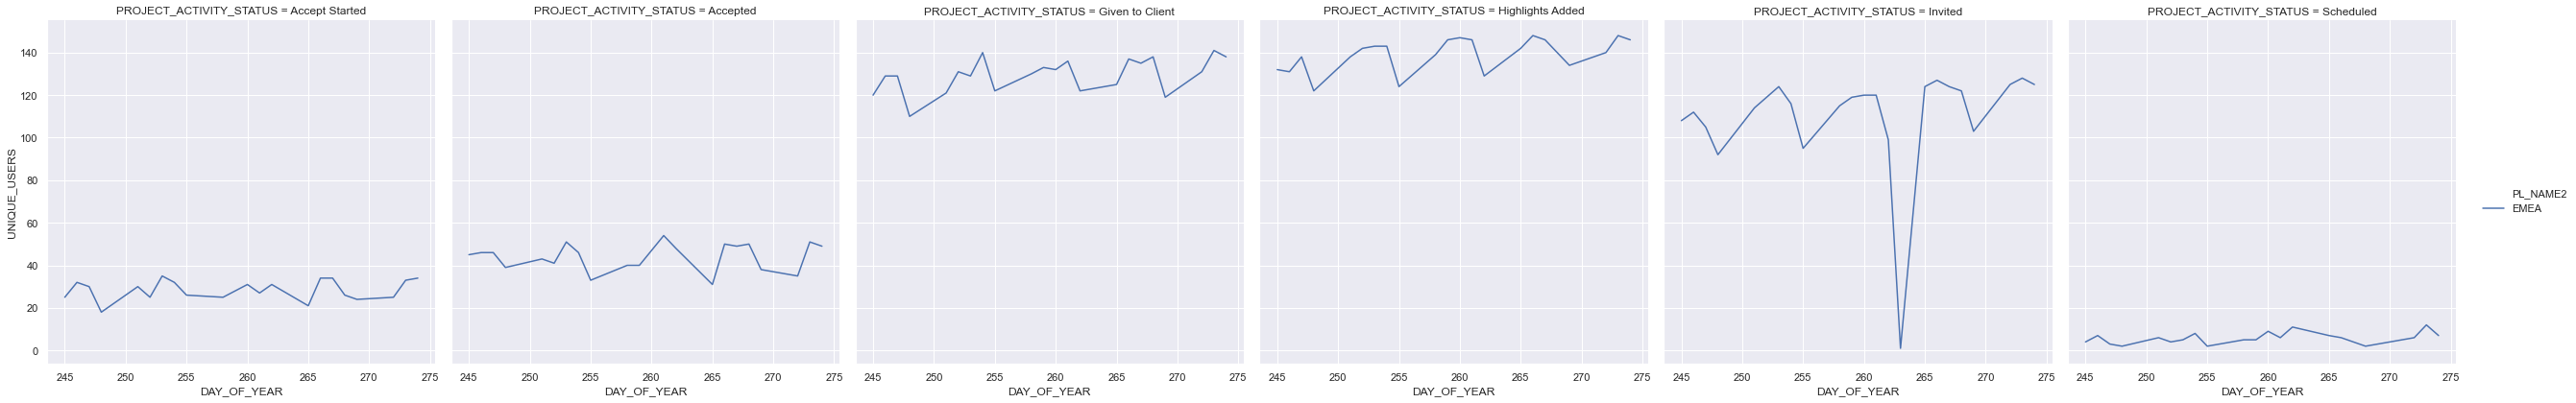

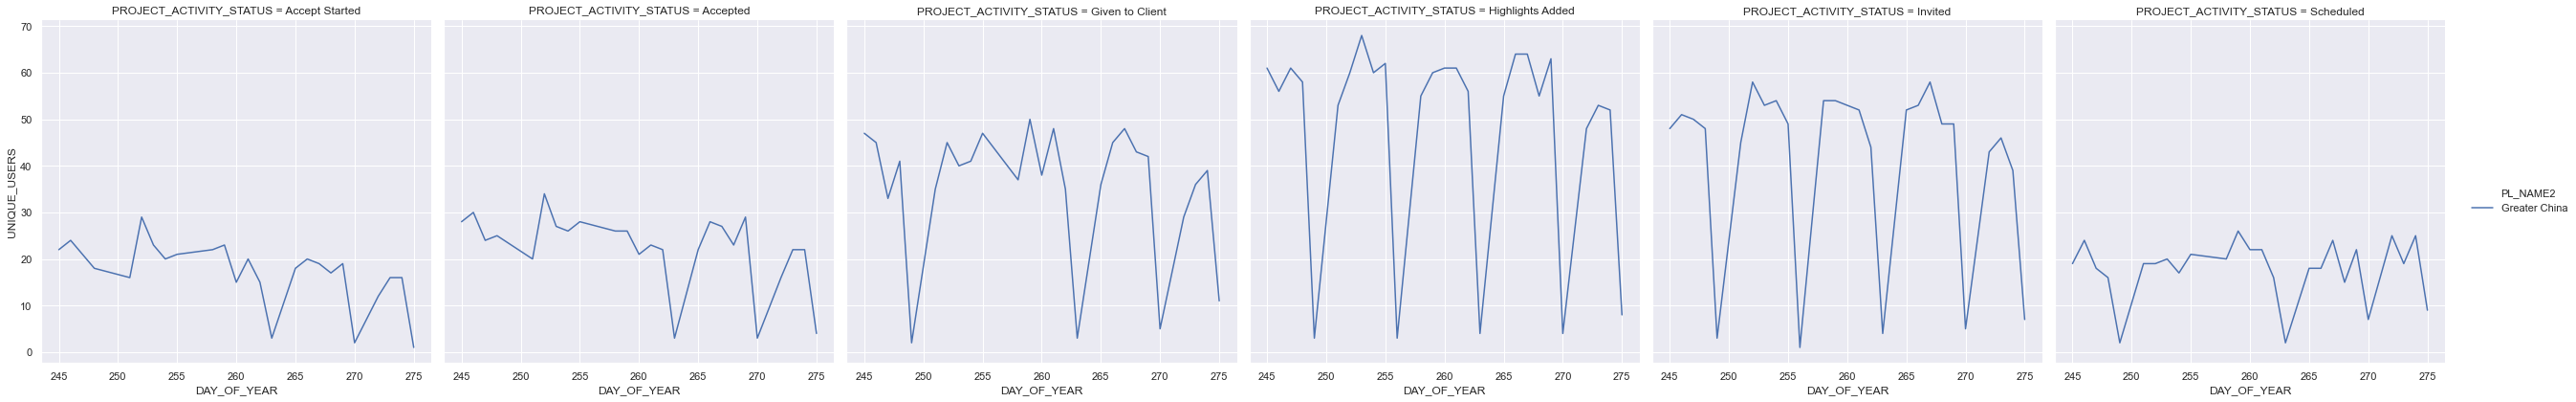

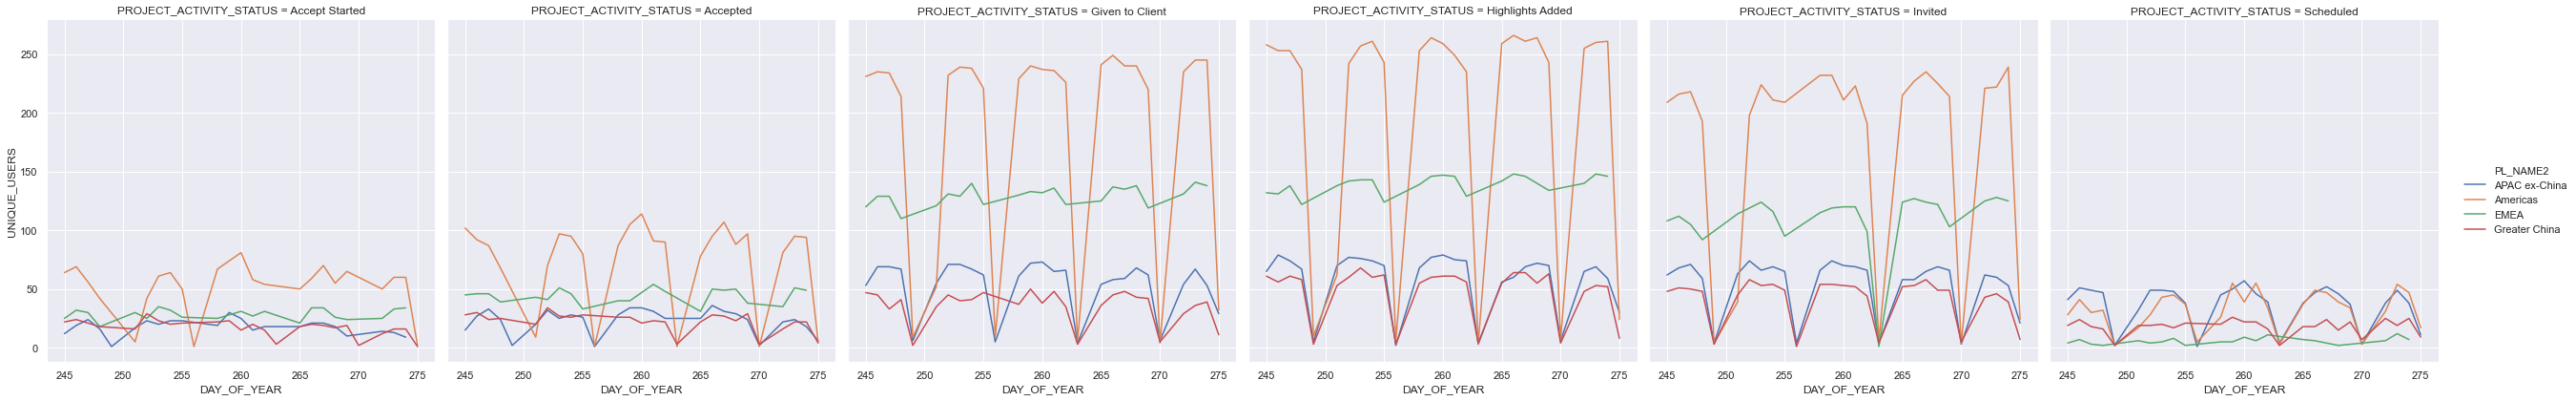

In [9]:
render(shape(df.loc[df.PL_NAME2 == 'Americas']))
render(shape(df.loc[df.PL_NAME2 == 'EMEA']))
render(shape(df.loc[df.PL_NAME2 == 'Greater China']))
render(shape(df))

# Total Global Activity Users

In [10]:
df_population = df

# region filters
#df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
# df_population = df_population.loc[df_population.REVREC_REGION == 'EMEA']
# df_population = df_population.loc[df_population.REVREC_BU == 'PSF']


# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
#df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invite Queued'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]

# robot filters
df_population = df_population.loc[~df_population.CREATED_BY.isin([0, 9999])]

# grouped
df_grouped = df_population.groupby(['PL_NAME2','DAY_OF_YEAR'])
df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
df_working = pd.DataFrame(df_working.to_records())
print(df_working)
df_working['CREATED_BY_ROLLING'] = df_working['CREATED_BY'].rolling(7).mean()
df_working.tail()

          PL_NAME2  DAY_OF_YEAR  CREATED_BY
0    APAC ex-China          245          77
1    APAC ex-China          246          81
2    APAC ex-China          247          79
3    APAC ex-China          248          77
4    APAC ex-China          249           8
..             ...          ...         ...
99   Greater China          270          10
100  Greater China          272          59
101  Greater China          273          59
102  Greater China          274          58
103  Greater China          275          15

[104 rows x 3 columns]


,PL_NAME2,DAY_OF_YEAR,CREATED_BY,CREATED_BY_ROLLING
99,Greater China,270,10,50.571429
100,Greater China,272,59,58.285714
101,Greater China,273,59,57.714286
102,Greater China,274,58,56.000000
103,Greater China,275,15,48.285714


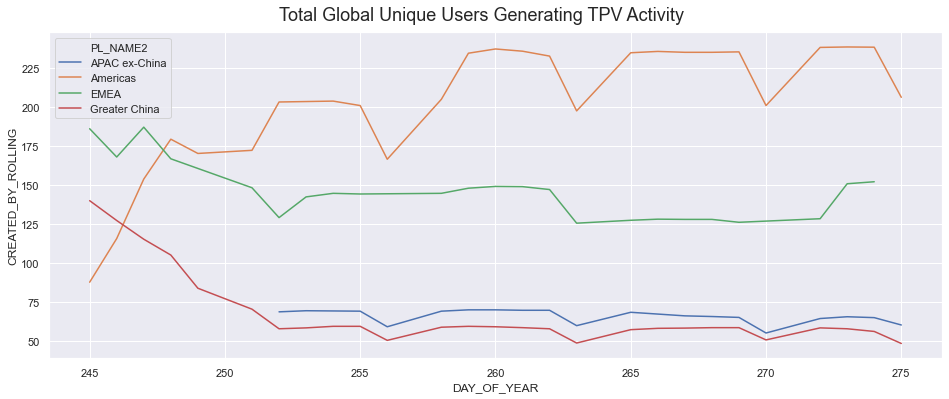

In [11]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(16, 6))
f.suptitle('Total Global Unique Users Generating TPV Activity', fontsize="18", y=0.94)
ax = sns.lineplot(x="DAY_OF_YEAR", y="CREATED_BY_ROLLING", hue="PL_NAME2",data=df_working)

# User Activity at Time of Day

In [12]:
df_population = df.copy()

# df_population = df_population.loc[df_population.CREATED_BY.isin([6361, 6360])]
# df_population = df_population.loc[df_population.CREATED_BY.isin([5374])]

# revrec filters
df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
# df_population = df_population.loc[df_population.REVREC_BU == 'NAFS']
# df_population = df_population.loc[df_population.REVREC_BU == 'Corporate']
# df_population = df_population.loc[df_population.REVREC_BU == 'PSF']

# df_population = df_population.loc[df_population.REVREC_REGION == 'EMEA']
# df_population = df_population.loc[df_population.REVREC_REGION == 'ASIA']

# P&L filters
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Private']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Public']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas PSF']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Corporate']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Credit']

# df_population = df_population.loc[df_population.PL_NAME == 'Greater China'] 

# activity filters
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invited', 'Invite Queued'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Highlights Added'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Added to List'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Given to Client'])]

df_population.tail()

,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE,DAY_OF_YEAR,DAY_OF_WEEK
358924,2020,9,22,36,12,1,Sep 1 2020 12:06PM,Americas Public,Americas,Americas,...,Highlights Added,2020,8,21,36,23,1,Aug 31 2020 11:26PM,245,1
358925,2020,9,22,38,15,1,Sep 17 2020 3:22PM,Americas PSF,Americas,Americas,...,Highlights Added,2020,9,22,36,18,1,Sep 2 2020 6:00PM,261,3
358926,2020,9,22,37,13,1,Sep 8 2020 1:22PM,Americas Public,Americas,Americas,...,Highlights Added,2020,9,22,36,13,1,Sep 1 2020 1:50PM,252,1
358934,2020,9,22,38,19,1,Sep 15 2020 7:26PM,Americas PSF,Americas,Americas,...,Given to Client,2020,9,22,38,16,1,Sep 15 2020 4:29PM,259,1
358936,2020,9,22,37,15,1,Sep 11 2020 3:29PM,Americas Public,Americas,Americas,...,Highlights Added,2020,9,22,37,14,1,Sep 11 2020 2:01PM,255,4


In [13]:
def shape_hourly_box(df):
    # robot filters
    df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
    df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

    # grouped
    df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'DAY_OF_YEAR', 'ACTIVITY_HOUR_NUMBER','PL_NAME2'])
    df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
    df_working['ACTIVITY_COUNT'] = df_grouped['ACTIVITY_HOUR_NUMBER'].count().to_frame()['ACTIVITY_HOUR_NUMBER']
    df_working = pd.DataFrame(df_working.to_records())
    df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['CREATED_BY']
    return df_working

# date filters
df_working = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
# df_working = df_working.loc[df_working.ACTIVITY_MONTH_NUMBER.isin([9])]
df_working = df_working.loc[df_working.ACTIVITY_MONTH_NUMBER == 9]
df_working = shape_hourly_box(df_working)
df_working.tail()

,ACTIVITY_YEAR_NUMBER,DAY_OF_YEAR,ACTIVITY_HOUR_NUMBER,PL_NAME2,CREATED_BY,ACTIVITY_COUNT,ACTIVITY_PER_USER
438,2020,274,23,Americas,59,161,2.728814
439,2020,275,0,Americas,27,77,2.851852
440,2020,275,1,Americas,13,56,4.307692
441,2020,275,2,Americas,23,43,1.869565
442,2020,275,3,Americas,10,18,1.800000


In [14]:
def offset_hours(df, utc_offset):
    # Adjust offset to CST
    df_adjusted = df.copy()
    df_adjusted['ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] + utc_offset
    df_adjusted.loc[df_adjusted['ACTIVITY_HOUR_NUMBER'] < 0, 'ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] + 24
    df_adjusted.loc[df_adjusted['ACTIVITY_HOUR_NUMBER'] > 23, 'ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] - 24
    df_adjusted['ACTIVITY_HOUR_NUMBER'].unique()
    return df_adjusted

df_adjusted = offset_hours(df_working, -6)
# df_adjusted = offset_hours(df_working, 7)
df_adjusted['ACTIVITY_HOUR_NUMBER'].unique()

array([22, 23,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21,  0,  1,  2,  3])

In [15]:
def render_hourly_box(df, field, title, offset=0, ylabel=''):    
    # set up plot options
    color_black_primary = (0.0, 0.0, 0.0, 0.87)
    color_black_secondary = (0.0, 0.0, 0.0, 0.7)
    
    f, ax = plt.subplots(figsize=(22, 9))
    f.suptitle(title, 
               fontsize="24", 
               y=0.94,
               color=color_black_primary)

    # plot it!
    ax_1 = sns.boxplot(x="ACTIVITY_HOUR_NUMBER", 
                       y=field,
                       width=.9,
                       linewidth=1.3,
                       fliersize=1.75,
                       ax=ax,
                       palette=sns.cubehelix_palette(7),
               data=df)

    # set xlabel
    if (offset == 0):
        ax_1.set(xlabel='Hour of Day (UTC±00:00)')
    if (offset > 0):
        ax_1.set(xlabel='Hour of Day (UTC+{:02}:00)'.format(offset)) 
    if (offset < 0):
        ax_1.set(xlabel='Hour of Day (UTC-{:02}:00)'.format(abs(offset))) 
        
    # set ylabel
    if (ylabel != ''):
        ax_1.set(ylabel=ylabel)  
        
    # clean up x and y axis
    ax_1.xaxis.set_label_coords(0.5, -0.1) 
    ax_1.yaxis.set_label_coords(-0.044, 0.5)
    ax_1.xaxis.label.set_color(color_black_primary) 
    ax_1.yaxis.label.set_color(color_black_primary)
    ax_1.tick_params(colors=color_black_primary)


#render_hourly_box(df_adjusted, "CREATED_BY", "Employees Generating TPV Activity (Invites, Phone Accepts, Highlights, GTC)", offset=-6, ylabel='Active Employees')

# Houry TPV Activities for Americas

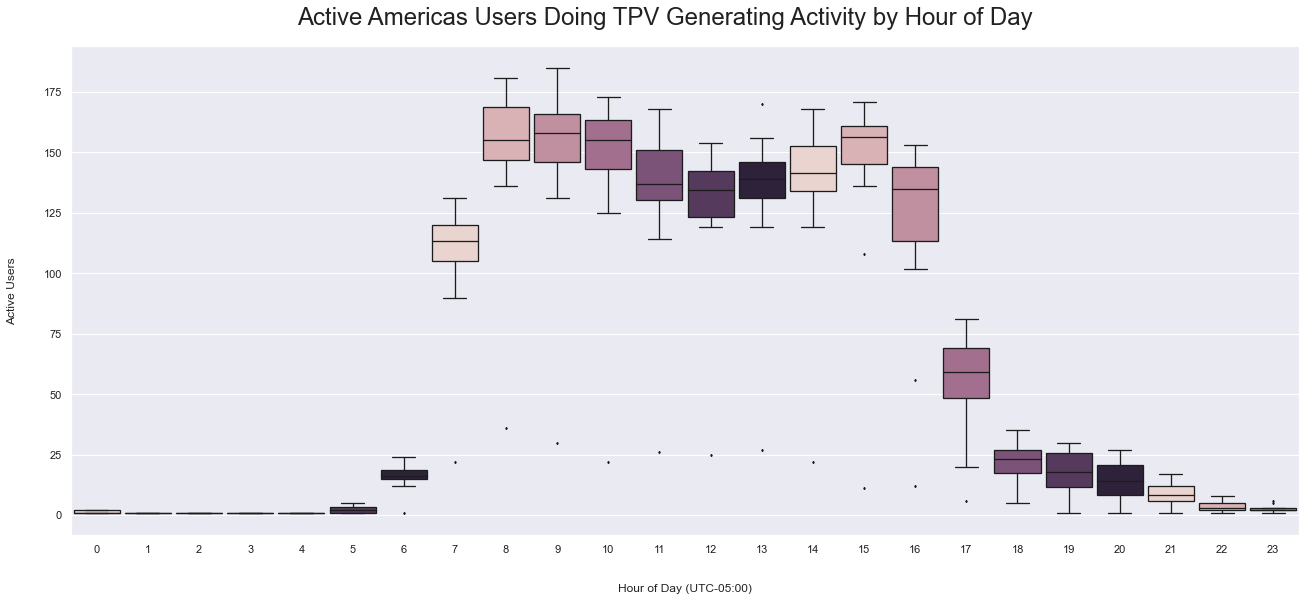

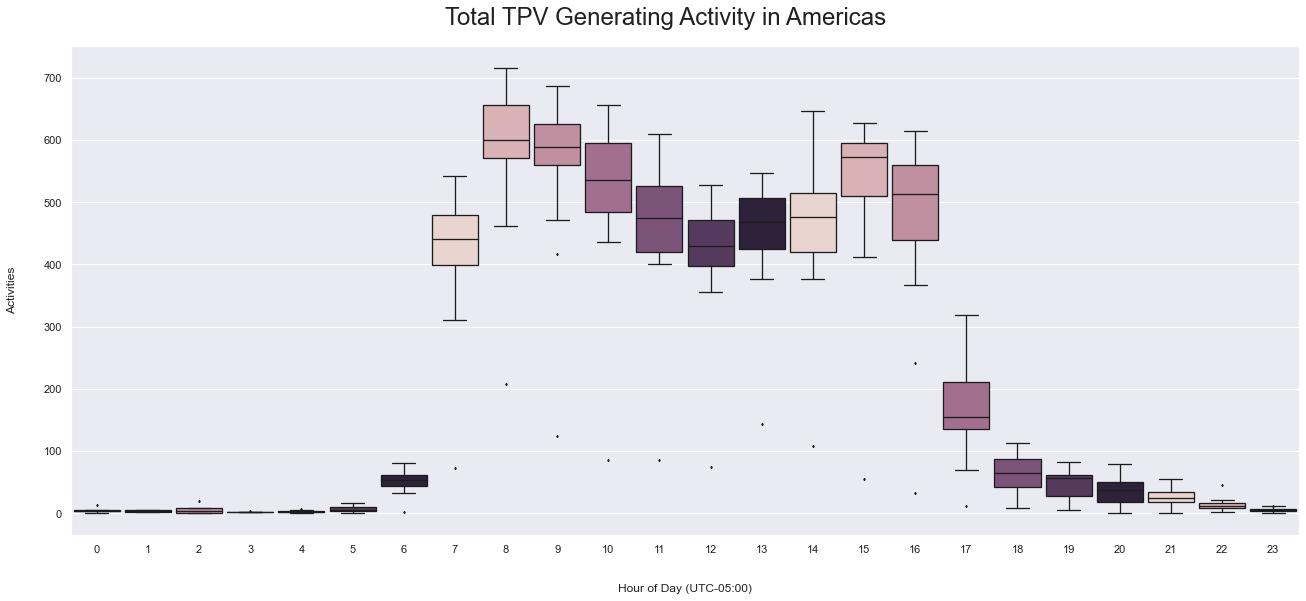

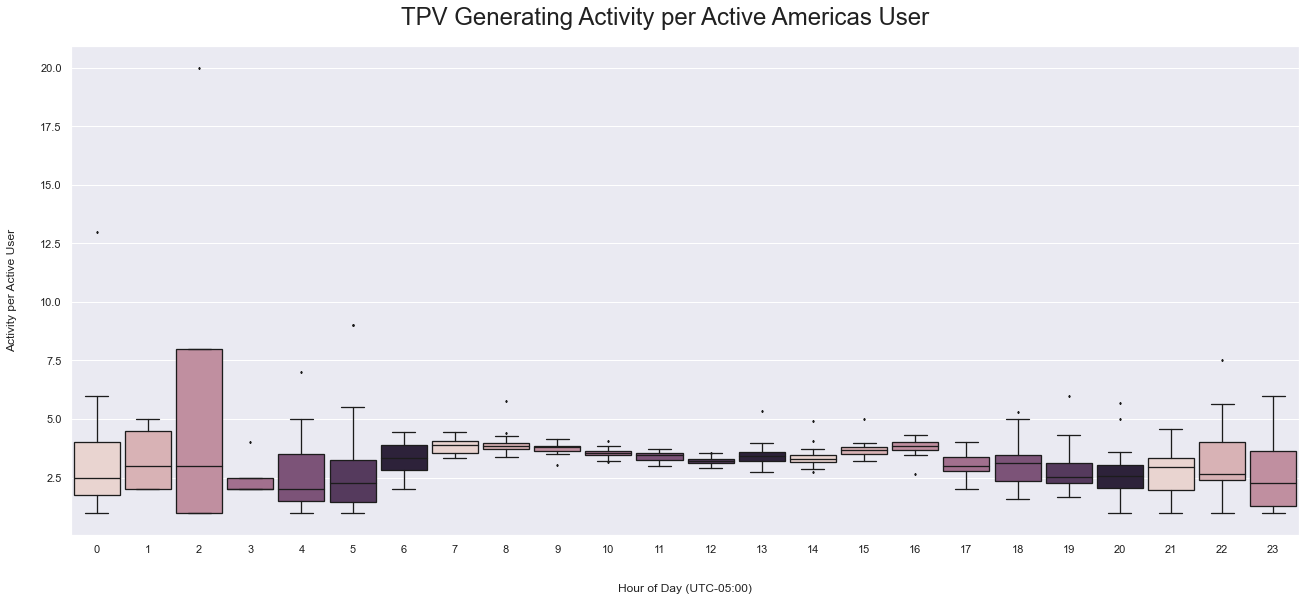

In [16]:
render_hourly_box(df_adjusted, "CREATED_BY", "Active Americas Users Doing TPV Generating Activity by Hour of Day", offset=-5, ylabel='Active Users')
render_hourly_box(df_adjusted, "ACTIVITY_COUNT", "Total TPV Generating Activity in Americas", offset=-5, ylabel='Activities')
render_hourly_box(df_adjusted, "ACTIVITY_PER_USER", "TPV Generating Activity per Active Americas User", offset=-5, ylabel='Activity per Active User')

# Houry TPV Activities for Greater China

In [17]:
df_population = df

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'Greater China']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted','Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

df_population = offset_hours(shape_hourly_box(df_population), 8)

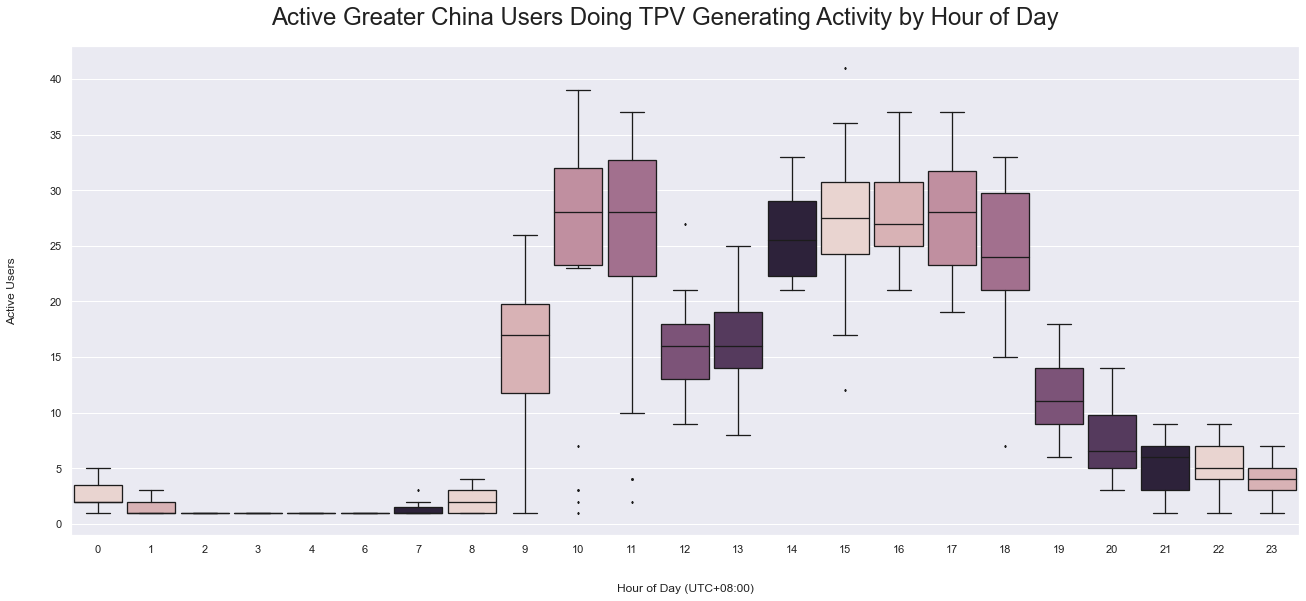

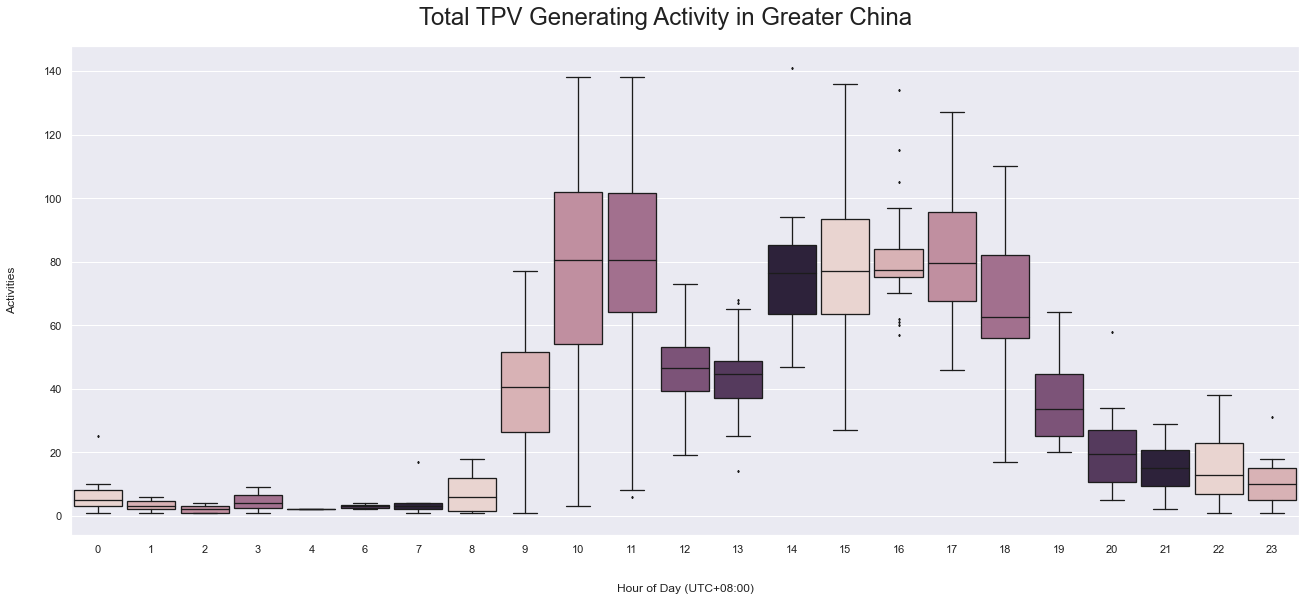

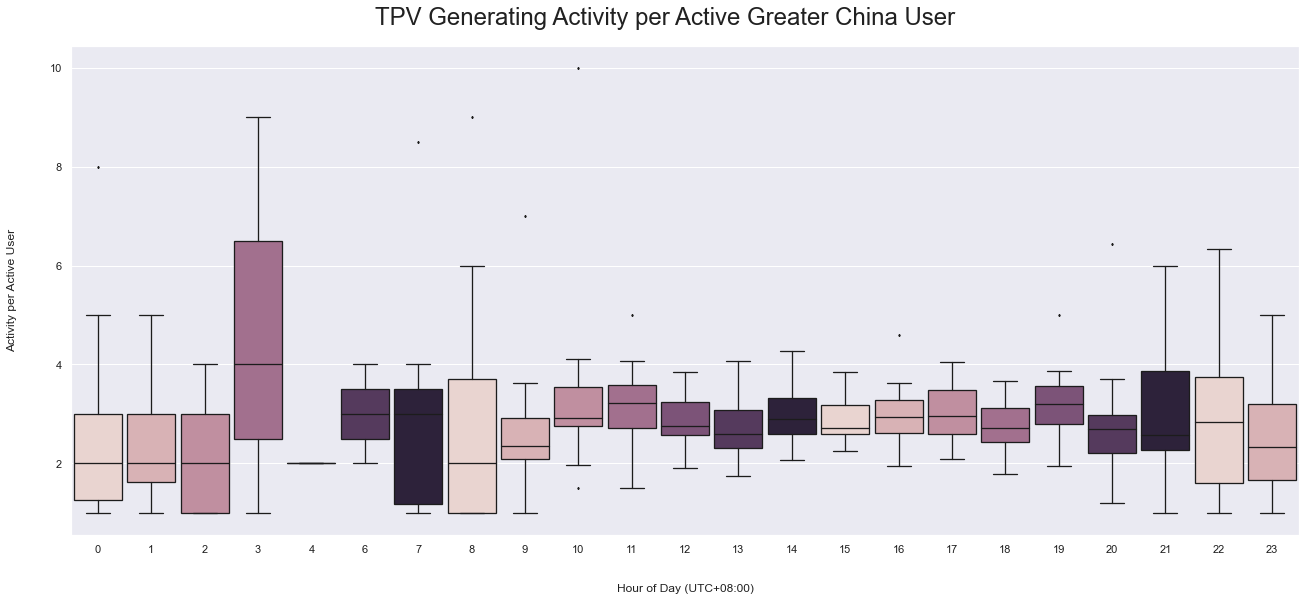

In [18]:
render_hourly_box(df_population, "CREATED_BY", "Active Greater China Users Doing TPV Generating Activity by Hour of Day", offset=8, ylabel='Active Users')
render_hourly_box(df_population, "ACTIVITY_COUNT", "Total TPV Generating Activity in Greater China", offset=8, ylabel='Activities')
render_hourly_box(df_population, "ACTIVITY_PER_USER", "TPV Generating Activity per Active Greater China User", offset=8, ylabel='Activity per Active User')

# Houry TPV Activities for EMEA

In [19]:
df_population = df.copy()

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'EMEA']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted','Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    
df_population.head()

df_population = offset_hours(shape_hourly_box(df_population), 1)

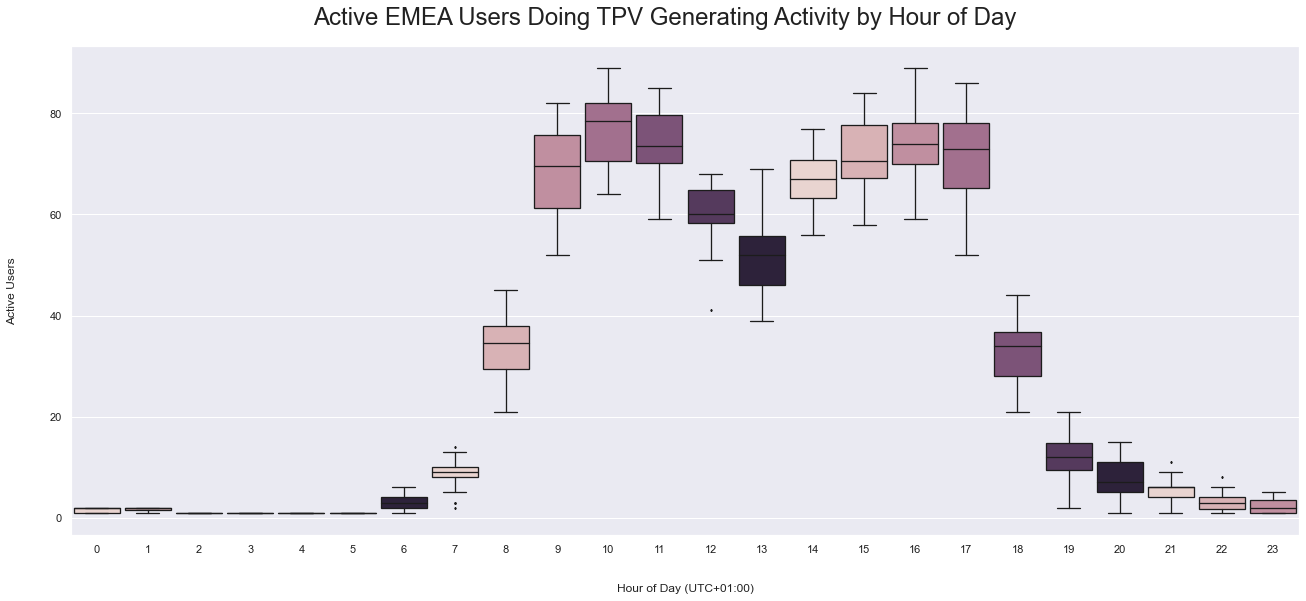

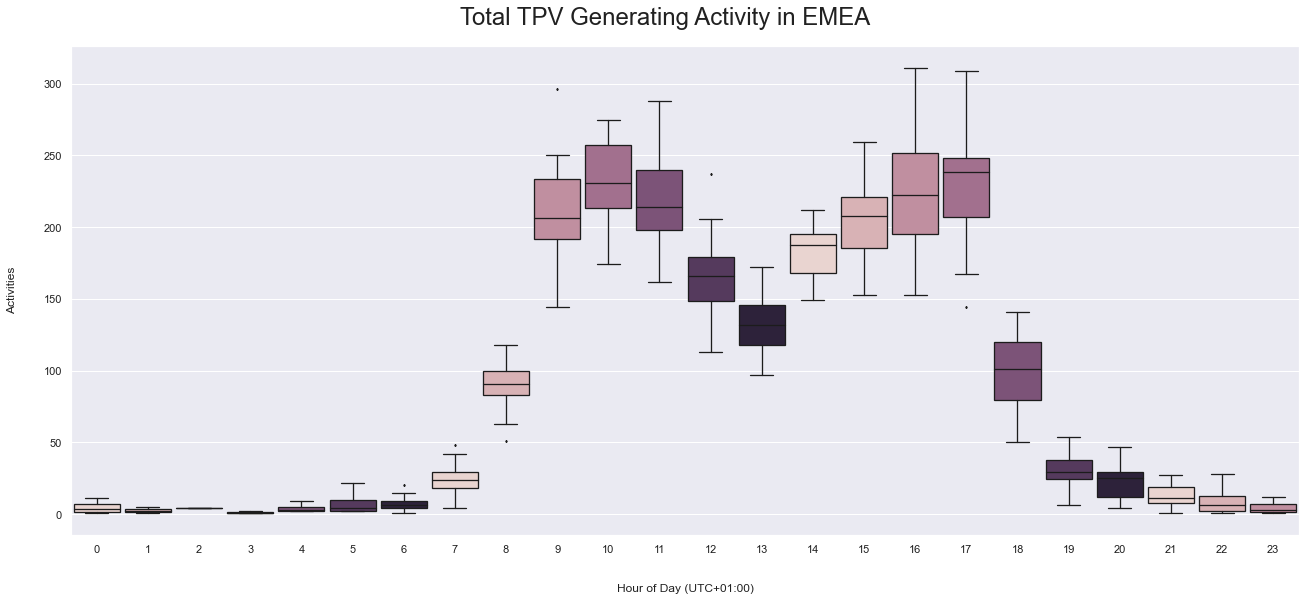

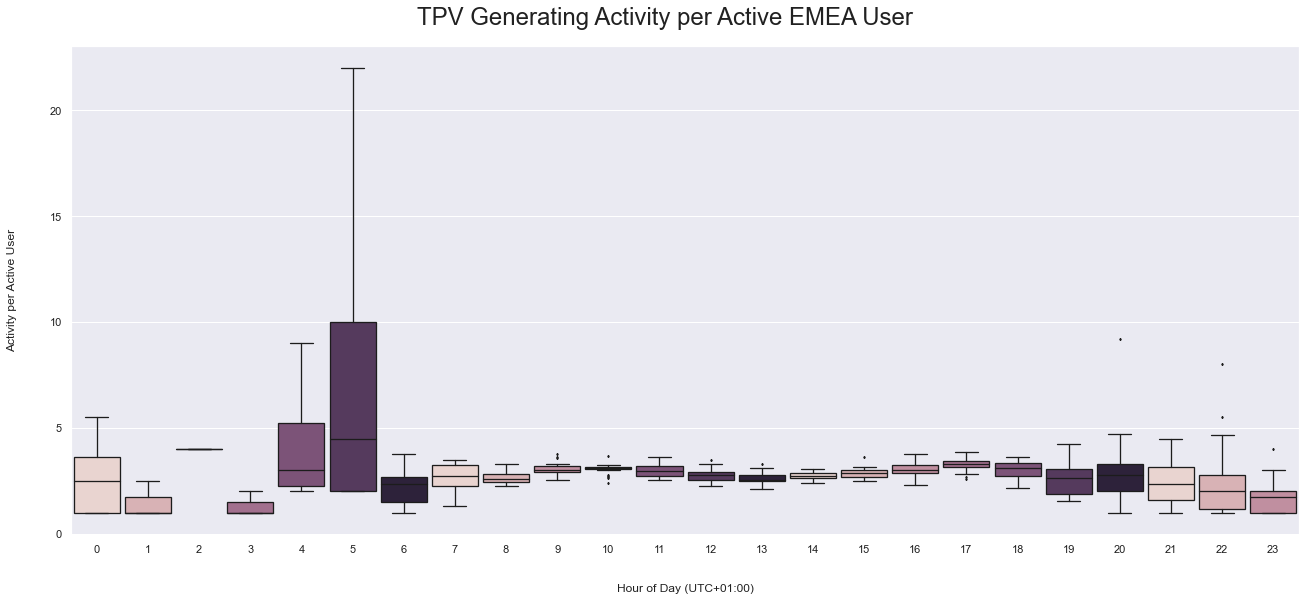

In [20]:
render_hourly_box(df_population, "CREATED_BY", "Active EMEA Users Doing TPV Generating Activity by Hour of Day", offset=1, ylabel='Active Users')
render_hourly_box(df_population, "ACTIVITY_COUNT", "Total TPV Generating Activity in EMEA", offset=1, ylabel='Activities')
render_hourly_box(df_population, "ACTIVITY_PER_USER", "TPV Generating Activity per Active EMEA User", offset=1, ylabel='Activity per Active User')

# Houry TPV Activities for APAC ex-China (cannot define time zone)

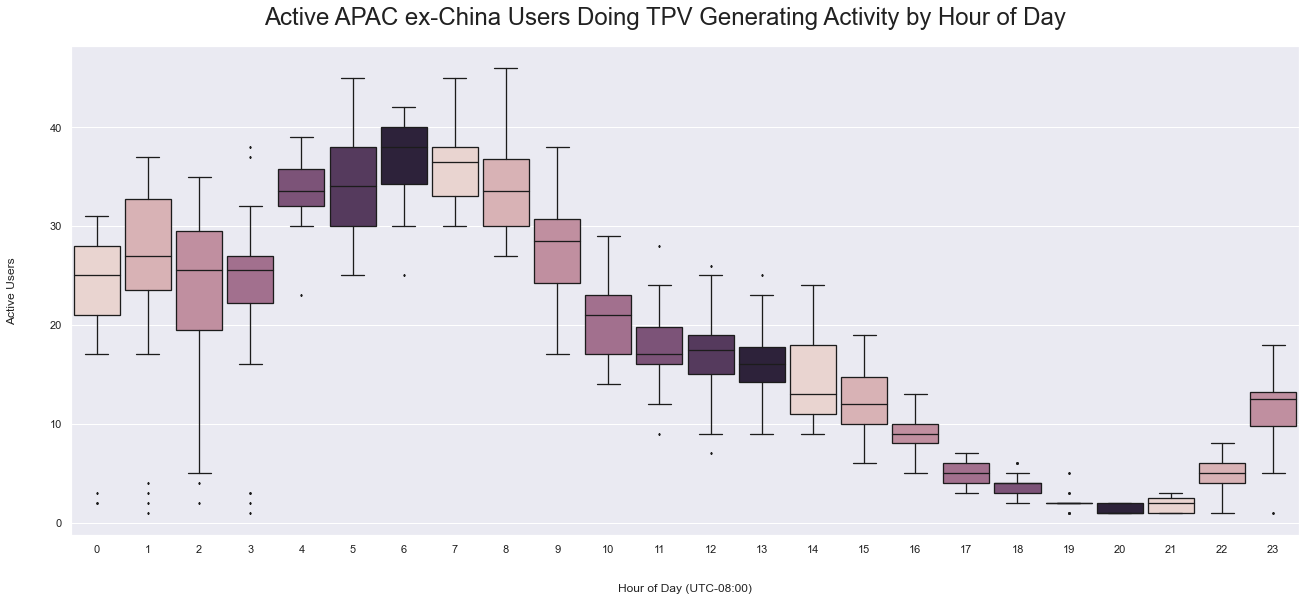

In [21]:
df_population = df.copy()

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'APAC ex-China']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted','Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    
df_population.head()

df_population = shape_hourly_box(df_population)
render_hourly_box(df_population, "CREATED_BY", "Active APAC ex-China Users Doing TPV Generating Activity by Hour of Day", offset=-8, ylabel='Active Users')

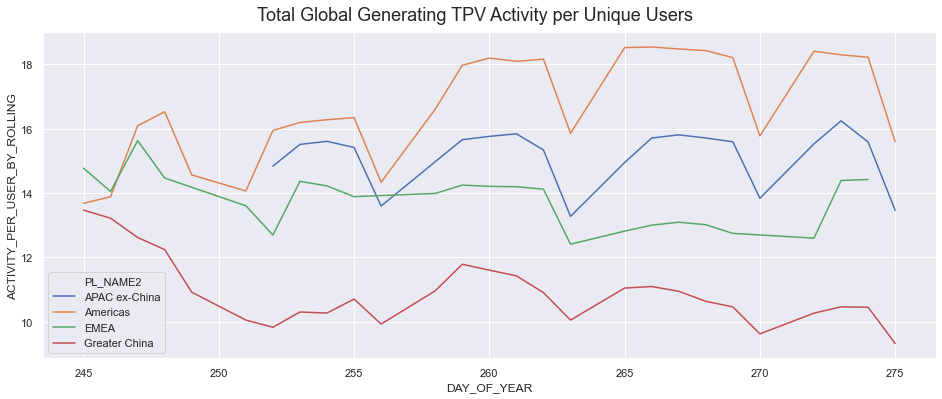

In [22]:
df_population = df
# date filters  
df_population= df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]


# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1] 

df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'PL_NAME2','DAY_OF_YEAR'])
df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
df_working['ACTIVITY_COUNT'] = df_grouped['PROJECT_ACTIVITY_STATUS'].count().to_frame()

df_working = pd.DataFrame(df_working.to_records())
df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['CREATED_BY']
df_working['ACTIVITY_PER_USER_BY_ROLLING'] = df_working['ACTIVITY_PER_USER'].rolling(7).mean()
df_working.tail()

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(16, 6))
f.suptitle('Total Global Generating TPV Activity per Unique Users', fontsize="18", y=0.94)
ax = sns.lineplot(x="DAY_OF_YEAR", y="ACTIVITY_PER_USER_BY_ROLLING", hue="PL_NAME2",data=df_working,ci=None)

In [23]:
df_population = df
# date filters  
df_population= df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]


# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1] 

df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'DAY_OF_YEAR', 'ACTIVITY_HOUR_NUMBER','PL_NAME2'])
df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
print(df_working)
df_working['ACTIVITY_COUNT'] = df_grouped['ACTIVITY_HOUR_NUMBER'].count().to_frame()['ACTIVITY_HOUR_NUMBER']
df_working = pd.DataFrame(df_working.to_records())
#df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['CREATED_BY']
#df_working['ACTIVITY_PER_USER_BY_ROLLING'] = df_working['ACTIVITY_PER_USER'].rolling(7).mean()

# region filters
conditions=[
    (df_working['PL_NAME2']=='APAC ex-China'),
    (df_working['PL_NAME2']=='Greater China'),
    (df_working['PL_NAME2']=='Americas'),
    (df_working['PL_NAME2']=='EMEA')
]

# create a list of values we want to assign for each condition
values=['91','78','326','203']
#Changing from 94 to 78 for Greater China

#create a new column and use np.select to assign values to it using our lists as arguments
df_working['ALL_CS']=np.select(conditions,values)
df_working['ALL_CS']=df_working['ALL_CS'].astype(str).astype(int)
df_working['Created_by_Perc']=df_working['CREATED_BY']/df_working['ALL_CS']

#display updated DataFrame
df_working.tail()

                                                                     CREATED_BY
ACTIVITY_YEAR_NUMBER DAY_OF_YEAR ACTIVITY_HOUR_NUMBER PL_NAME2                 
2020                 245         4                    APAC ex-China          30
                                                      Americas                5
                                                      Greater China          16
                                 5                    APAC ex-China          26
                                                      Americas                2
...                                                                         ...
                     275         2                    Americas               23
                                                      Greater China           7
                                 3                    APAC ex-China          27
                                                      Americas               10
                                        

,ACTIVITY_YEAR_NUMBER,DAY_OF_YEAR,ACTIVITY_HOUR_NUMBER,PL_NAME2,CREATED_BY,ACTIVITY_COUNT,ALL_CS,Created_by_Perc
1759,2020,275,2,Americas,23,43,326,0.070552
1760,2020,275,2,Greater China,7,20,78,0.089744
1761,2020,275,3,APAC ex-China,27,85,91,0.296703
1762,2020,275,3,Americas,10,18,326,0.030675
1763,2020,275,3,Greater China,10,50,78,0.128205


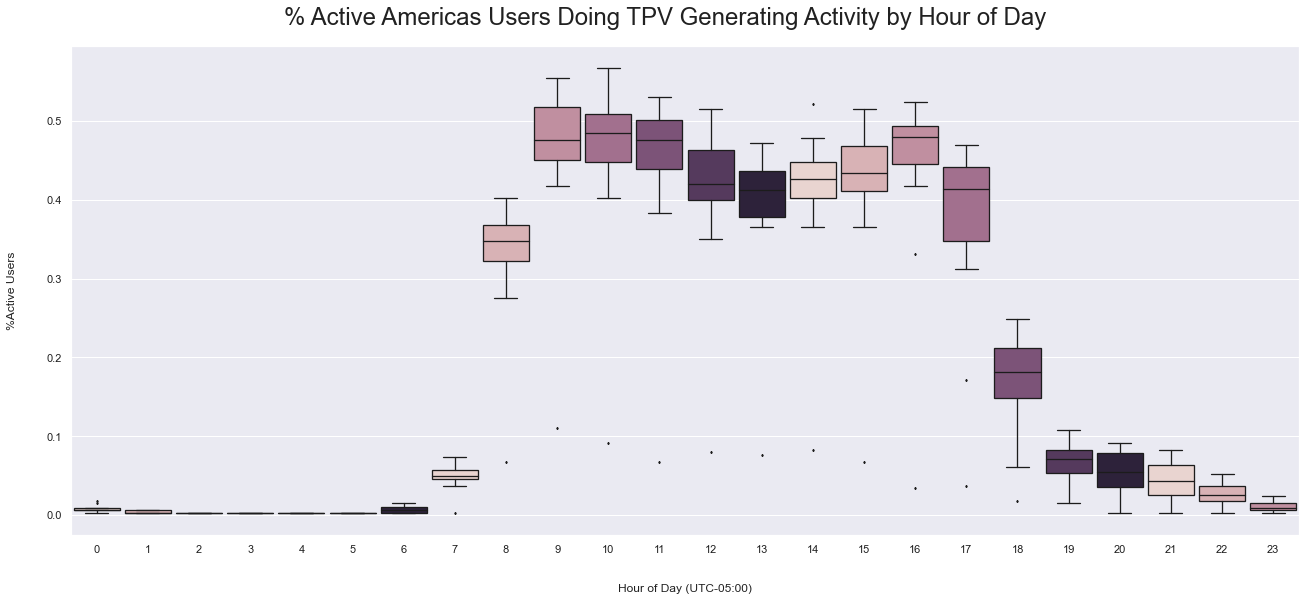

In [24]:
df_population = offset_hours(df_working, -5)
df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
render_hourly_box(df_population, "Created_by_Perc", "% Active Americas Users Doing TPV Generating Activity by Hour of Day",  offset=-5,ylabel='%Active Users')

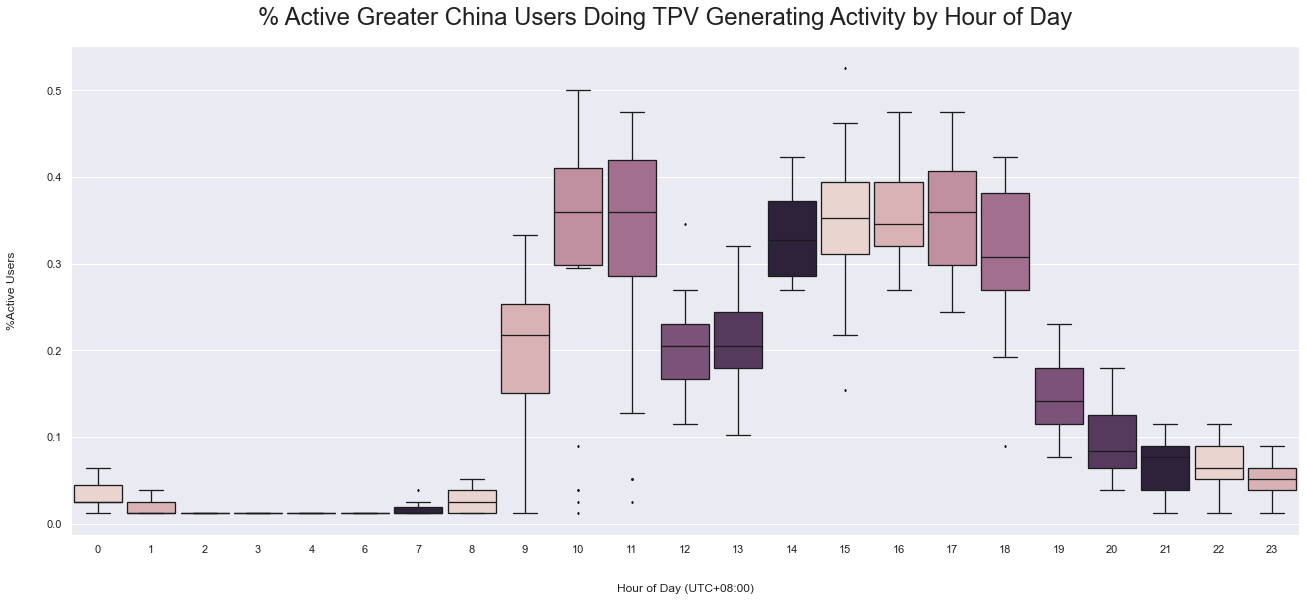

In [25]:
df_population = offset_hours(df_working, 8)
df_population = df_population.loc[df_population.PL_NAME2 == 'Greater China']
render_hourly_box(df_population, "Created_by_Perc", "% Active Greater China Users Doing TPV Generating Activity by Hour of Day", offset=8, ylabel='%Active Users')

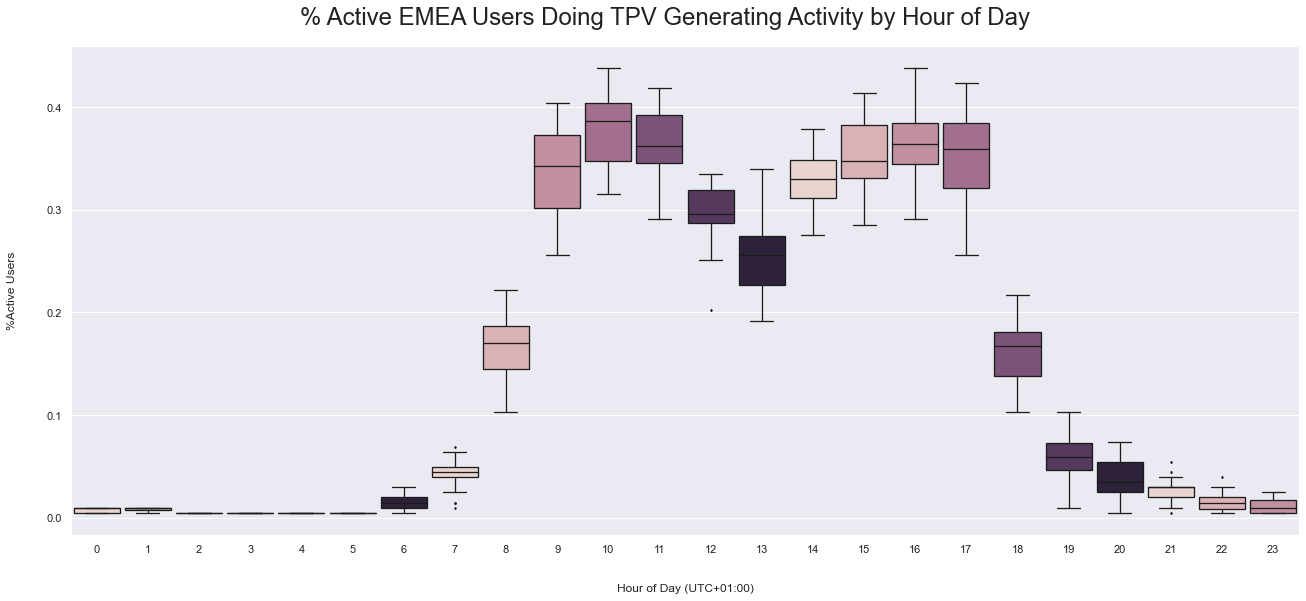

In [26]:
df_population = offset_hours(df_working, 1)
df_population = df_population.loc[df_population.PL_NAME2 == 'EMEA']
render_hourly_box(df_population, "Created_by_Perc", "% Active EMEA Users Doing TPV Generating Activity by Hour of Day", offset=1, ylabel='%Active Users')

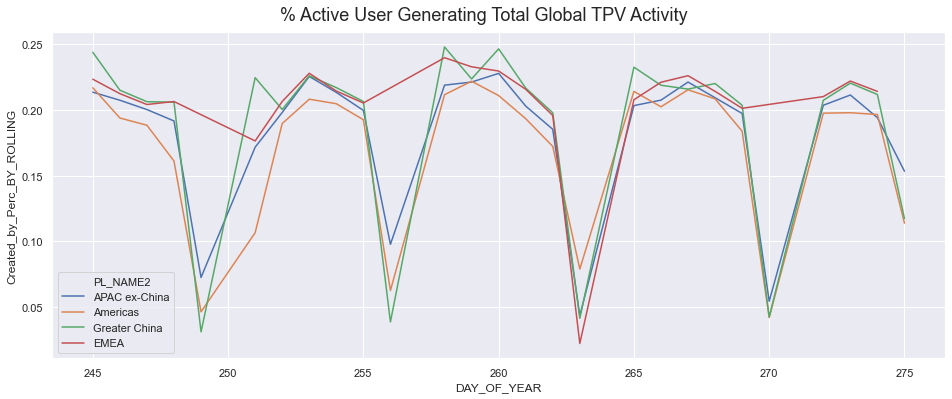

In [27]:
df_working['Created_by_Perc_BY_ROLLING'] = df_working['Created_by_Perc'].rolling(7).mean()
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(16, 6))
f.suptitle('% Active User Generating Total Global TPV Activity', fontsize="18", y=0.94)
ax = sns.lineplot(x="DAY_OF_YEAR", y="Created_by_Perc_BY_ROLLING", hue="PL_NAME2",data=df_working,ci=None)

In [50]:
df_population = df

def offset_days(df, utc_offset):
    df_adjusted = df.copy()
    df_adjusted['ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] + utc_offset
    df_adjusted.loc[df_adjusted['ACTIVITY_HOUR_NUMBER'] < 0, 'ACTIVITY_HOUR_NUMBER'] = df_adjusted['DAY_OF_WEEK'] -1
    df_adjusted.loc[df_adjusted['ACTIVITY_HOUR_NUMBER'] > 23, 'ACTIVITY_HOUR_NUMBER'] = df_adjusted['DAY_OF_WEEK'] +1
    df_adjusted['DAY_OF_WEEK'].unique()
    return df_adjusted


def shape_week_box(df):  
    # activity filters
    df_population = df.loc[df.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
    df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
    #df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1] 
    df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'DAY_OF_YEAR', 'DAY_OF_WEEK','PL_NAME2'])
    df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
    df_working['ACTIVITY_COUNT'] = df_grouped['DAY_OF_WEEK'].count().to_frame()['DAY_OF_WEEK']
    df_working = pd.DataFrame(df_working.to_records())
    
    # region filters
    conditions=[
        (df_working['PL_NAME2']=='APAC ex-China'),
        (df_working['PL_NAME2']=='Greater China'),
        (df_working['PL_NAME2']=='Americas'),
        (df_working['PL_NAME2']=='EMEA')
    ]
    
    # create a list of values we want to assign for each condition
    values=['91','78','326','203']
    #Changing from 94 to 78 for Greater China
    
    #create a new column and use np.select to assign values to it using our lists as arguments
    df_working['ALL_CS']=np.select(conditions,values)
    df_working['ALL_CS']=df_working['ALL_CS'].astype(str).astype(int)
    df_working['Created_by_Perc']=df_working['CREATED_BY']/df_working['ALL_CS']
    return df_working



def render_week_box(df, field, title, offset=0, ylabel=''):    
    # set up plot options
    color_black_primary = (0.0, 0.0, 0.0, 0.87)
    color_black_secondary = (0.0, 0.0, 0.0, 0.7)
    
    f, ax = plt.subplots(figsize=(22, 9))
    f.suptitle(title, 
               fontsize="24", 
               y=0.94,
               color=color_black_primary)

    # plot it!
    ax_1 = sns.boxplot(x="DAY_OF_WEEK", 
                       y=field,
                       width=.9,
                       linewidth=1.3,
                       fliersize=1.75,
                       ax=ax,
                       palette=sns.cubehelix_palette(7),
               data=df)

    # set xlabel
    if (offset == 0):
        ax_1.set(xlabel='Week of Day (UTC±00:00)')
    if (offset > 0):
        ax_1.set(xlabel='Week of Day (UTC+{:02}:00)'.format(offset)) 
    if (offset < 0):
        ax_1.set(xlabel='Week of Day (UTC-{:02}:00)'.format(abs(offset))) 
        
    # set ylabel
    if (ylabel != ''):
        ax_1.set(ylabel=ylabel)  
        
    # clean up x and y axis
    ax_1.xaxis.set_label_coords(0.5, -0.1) 
    ax_1.yaxis.set_label_coords(-0.044, 0.5)
    ax_1.xaxis.label.set_color(color_black_primary) 
    ax_1.yaxis.label.set_color(color_black_primary)
    ax_1.tick_params(colors=color_black_primary)


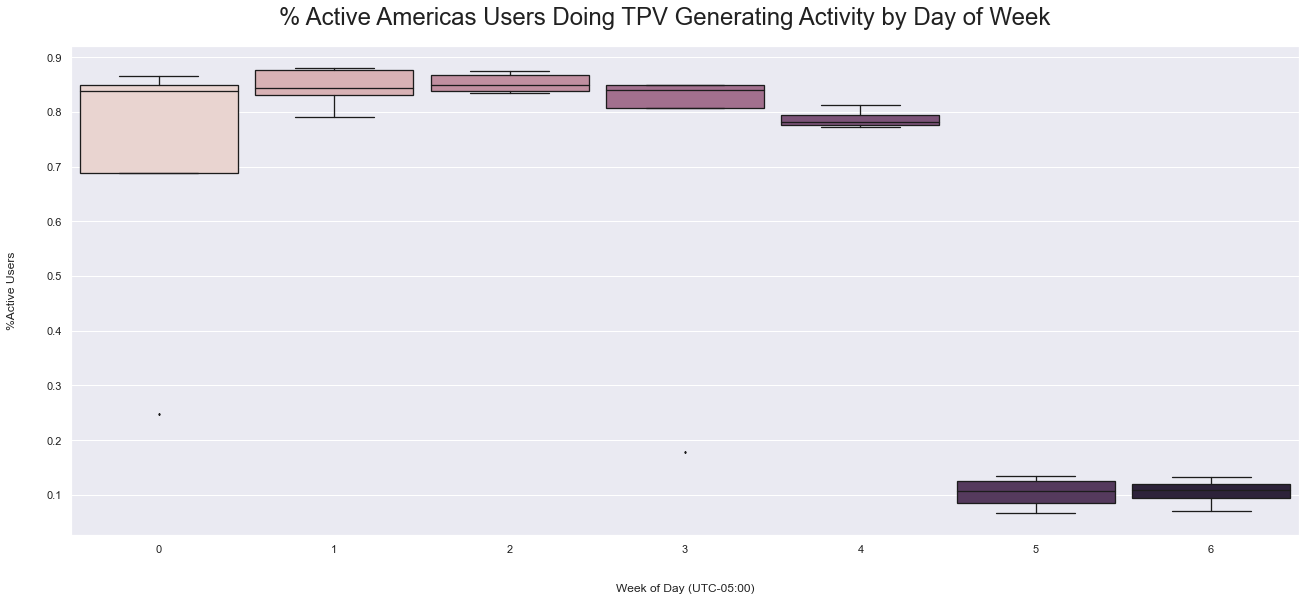

In [55]:
df_population = df
df_population= df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER == 9]
df_population = offset_days(df_population, -5)
df_working = shape_week_box(df_population)
df_working['DAY_OF_WEEK'].unique()

df_day = df_working.loc[df_working.PL_NAME2 == 'Americas']
render_week_box(df_day, "Created_by_Perc", "% Active Americas Users Doing TPV Generating Activity by Day of Week", offset=-5, ylabel='%Active Users')

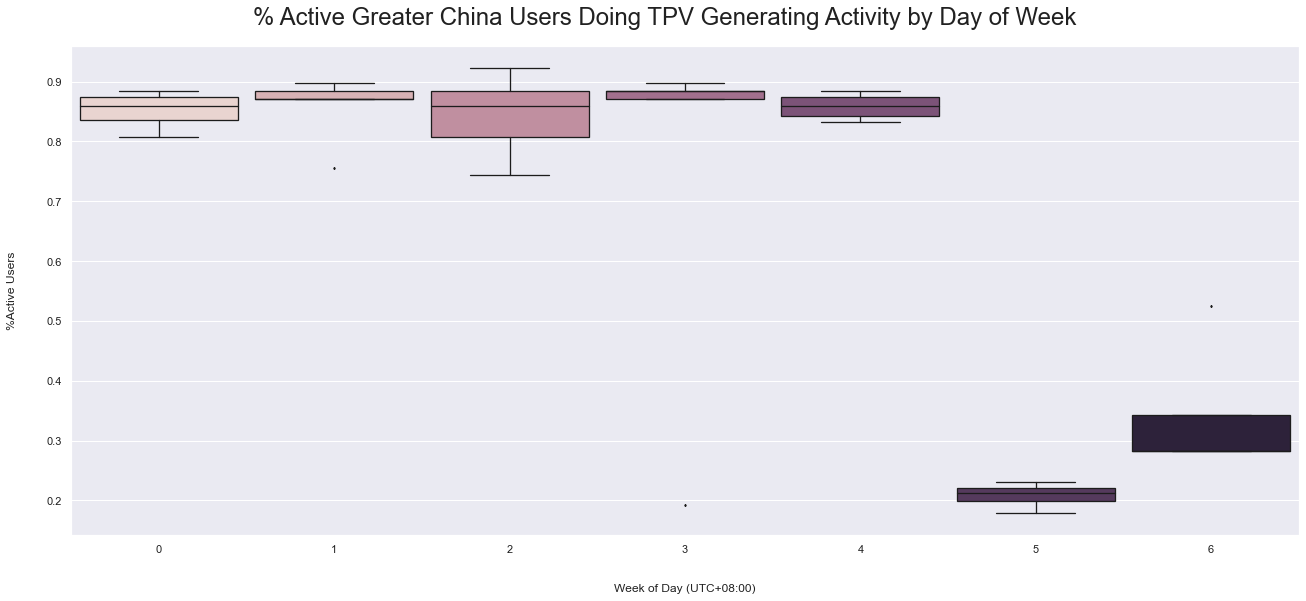

In [56]:
df_population = df
df_population= df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER == 9]
df_population = offset_days(df_population, 8)
df_working = shape_week_box(df_population)
df_working['DAY_OF_WEEK'].unique()

df_day = df_working.loc[df_working.PL_NAME2 == 'Greater China']
render_week_box(df_day, "Created_by_Perc", "% Active Greater China Users Doing TPV Generating Activity by Day of Week", offset=8, ylabel='%Active Users')

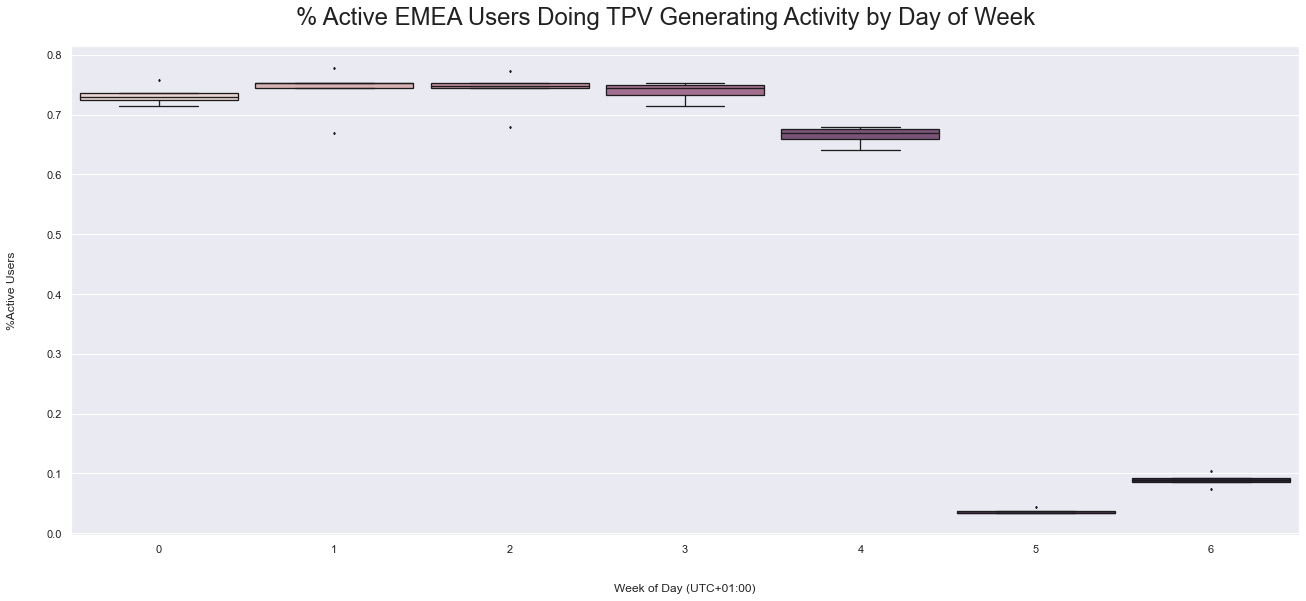

In [58]:
df_population = df
df_population= df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER == 9]
df_population = offset_days(df_population, 1)
df_working = shape_week_box(df_population)
df_working['DAY_OF_WEEK'].unique()

df_day = df_working.loc[df_working.PL_NAME2 == 'EMEA']
render_week_box(df_day, "Created_by_Perc", "% Active EMEA Users Doing TPV Generating Activity by Day of Week", offset=1, ylabel='%Active Users')